In [1]:
# This will install deepface through pip
!pip install deepface
!pip install rembg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# This will import all necessary libraries
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt
from rembg import remove
from PIL import Image

In [3]:
# PRE-REMBG
# This will import an image file using cv2
img = cv2.imread('z.jpg')
# img = cv2.imread('dis2.jpg')

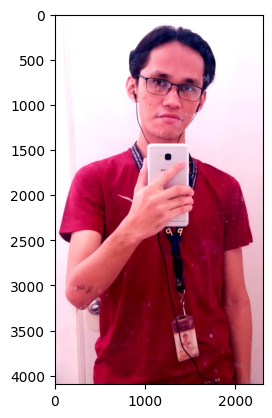

In [4]:
# This will display the image on its normal color
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [5]:
# set up input and output relative path
input_path = 'z.jpg'
output_path = 'dis1-e.jpg'
# input_path = 'dis2.png'
# output_path = 'dis2-e.png'

In [6]:
# load an image to input variable
input = Image.open(input_path)

In [7]:
# calls the remove function and save the results on output variable
output = remove(input)

100%|███████████████████████████████████████| 176M/176M [00:00<00:00, 29.7GB/s]


In [8]:
# saves the output on the output relative path
output.save(output_path)

OSError: ignored

In [ ]:
# POST-REMBG
# This will import an image file using cv2
img = cv2.imread('dis1-e.png')
# img = cv2.imread('dis2-e.png')

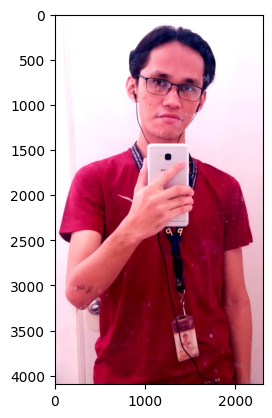

In [9]:
# This will display the image on its normal color
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [10]:
# The first code below will deny photos that are not considered as a face
# predictions = DeepFace.analyze(img, enforce_detection=False)
predictions = DeepFace.analyze(img)

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 76.4MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [00:02<00:00, 213MB/s]
Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5


gender_model_weights.h5 will be downloaded...


100%|██████████| 537M/537M [00:02<00:00, 228MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:02<00:00, 205MB/s]
Action: race: 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]


In [11]:
# I have no idea what the fuck this does but I still copied it
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [12]:
# This will draw a rectangle around the detected face
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(gray, 1.1, 4)

for(x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

In [13]:
# This will put the text sentiment on the image
# As well as try to put that text sentiment on the center of the image using its dimensions and text size
font = cv2.FONT_HERSHEY_SIMPLEX

textsize = cv2.getTextSize(predictions['dominant_emotion'], font, 1, 2)[0]
textX = (img.shape[1] - textsize[0]) // 2
textY = (img.shape[0] + textsize[1]) // 2

cv2.putText(img,
            predictions['dominant_emotion'],
            (textX, textY),
            font, (textsize[1]/textsize[0])*7,
            (0, 0, 255),
            3,
            cv2.LINE_4);

TypeError: ignored

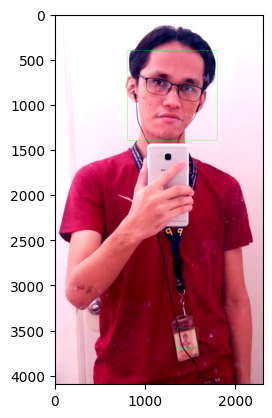

In [14]:
# This will again display the image but with the text sentiment
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
# This will export the image as an actual file
# To be applied on the chatbot soon...
# cv2.imwrite('test.png', img)

In [15]:
# This will display all prediction results including dominant emotion, age, gender, and race
predictions

[{'emotion': {'angry': 8.21114182472229,
   'disgust': 0.15522243920713663,
   'fear': 36.74692511558533,
   'happy': 0.003345131335663609,
   'sad': 52.14053392410278,
   'surprise': 0.012224575038999319,
   'neutral': 2.730608731508255},
  'dominant_emotion': 'sad',
  'region': {'x': 802, 'y': 403, 'w': 995, 'h': 995},
  'age': 27,
  'gender': {'Woman': 0.00822689471533522, 'Man': 99.991774559021},
  'dominant_gender': 'Man',
  'race': {'asian': 71.08391523361206,
   'indian': 6.201311573386192,
   'black': 1.801890879869461,
   'white': 7.9598210752010345,
   'middle eastern': 1.2348239310085773,
   'latino hispanic': 11.718244850635529},
  'dominant_race': 'asian'}]